
# Project: No Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project we'll explore a dataset collects information from 100K medical appointments in Brazi & is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
<li>ScheduledDay tells us on what day the patient set up their appointment.</li>
<li>Neighborhood indicates the location of the hospital.</li>
<li>Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program.</li>
<li>No_show  indicates whether the patients were 'present' or 'absent' at their appointments. 'yes' stands for 'absent' & 'No' stands for 'present'.</li>


### Question(s) for Analysis
#### Questions 1:
<li>What is the percentage of present & absent patients?</li>

#### Question 2:
<li>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?</li>

#### Question 3:
<li>In Which day are the most appointment made? How was the attendance rate for each day?</li>

In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
In This section we'll first load our data and take alook in it and see which data is useful to us & which is not. Also we'll look for any incomplete or missing data and try to fix it.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Gives us the num of rows & columns in the dataset
df.shape

(110527, 14)

In [5]:
# Check for duplicate data
df.duplicated().sum()

0

Ther is no duplicated data.

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As .info() shows us ther is no missing data.


### Data Cleaning
In the following cells we'll drop the non important columns,
rename the columns & replace no_show data for better understanding
 

In [8]:
# Drop those columns that are not important for the analysis
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [11]:
# Drop the rows that contains age less than 0
df.drop(df[(df.age < 0)].index, inplace = True)

In [12]:
df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

We'll work with age from 0 to 115.

In [13]:
# Replace no_show data for better understanding
# Replace Gender categories
df['no_show'].replace({'No':'Present', 'Yes':'Absent'}, inplace=True)
df['gender'].replace({'F':'Female', 'M':'Male'}, inplace = True)

In [14]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,Female,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Present
1,Male,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Present
2,Female,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Present
3,Female,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present
4,Female,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Present


<a id='eda'></a>
## Exploratory Data Analysis
In this section we'll observe the data we cleaned earlier and ask some questions and try to answer them by using box plots, Bar & Pie charts and histograms.
### Research Question 1
<li>(What is the percentage of present & absent patients?)</li>

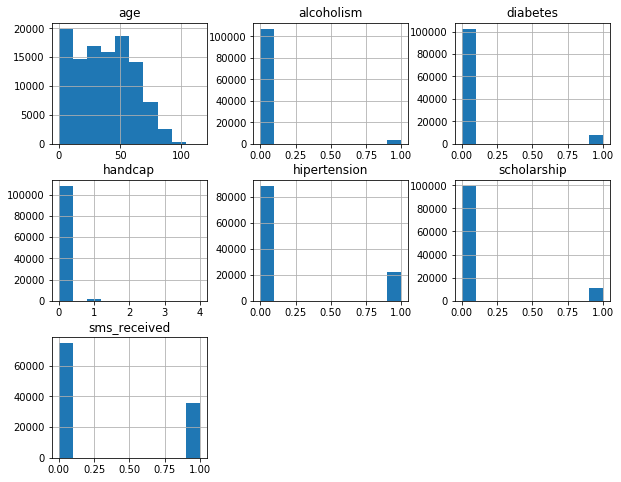

In [15]:
# Exploring the data distribution for each variable
df.hist(figsize=(10, 8));

In [16]:
present = (df.no_show == 'Present').sum()
present

88207

In [17]:
absent = (df.no_show == 'Absent').sum()
absent

22319

In [18]:
# Percentage of present & absent
(present/(present + absent)*100, absent/(present + absent)*100)

(79.806561352080053, 20.193438647919944)

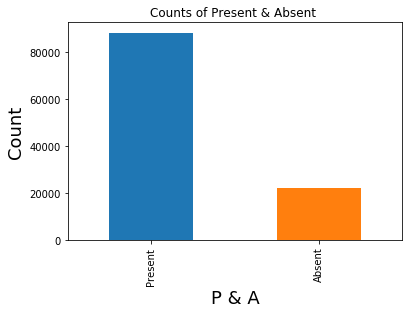

In [19]:
# Plotting bar chart for the present & absent
df['no_show'].value_counts().plot(kind='bar', title = 'Counts of Present & Absent ')
plt.xlabel('P & A', fontsize=18)
plt.ylabel('Count', fontsize=18);

This bar chart shows us that the amount of people who attended their appointment are greater than who did not.

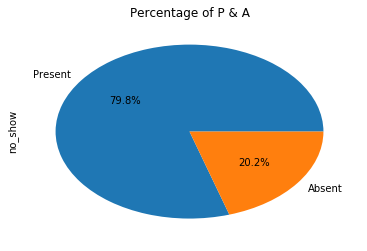

In [20]:
# Plotting pie chart for the present & absent
df['no_show'].value_counts().plot(kind='pie', title = 'Percentage of P & A', autopct='%1.1f%%');

### Result:
The analysis done above shows us that most of the patients really did atted their appointments. The numbers tells us that (79.8%) of the patients attended their appointments & (20.2%) did not. 

### Reserch Question 2:
<li>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?</li>

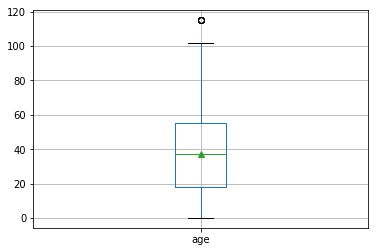

In [21]:
# boxplot for age
df.boxplot(['age'], showmeans=True);

We can see here that the mean age is 37.088874 .

In [22]:
# Function for bar plot to escape the repetitive code
def plot_bar(variable):
    df.groupby([variable, 'no_show']).size().unstack('no_show').plot(kind='bar', rot=0, title = 'Counts by '+variable+ ' Showing Up')
    plt.xlabel(variable, fontsize=18)
    plt.ylabel('Count', fontsize=18);

In [23]:
# Function for pie plot to escape the repetitive code
def plot_pie(variable):
    df.groupby([variable, 'no_show']).count()['age'].plot(kind='pie', title = 'Percentage by '+variable+ ' Showing Up', autopct='%1.1f%%')
    plt.ylabel('');

### Gender

In [24]:
# Count num of absent & present females & males
df.groupby(['gender', 'no_show']).size().unstack('gender')

gender,Female,Male
no_show,,
Absent,14594,7725
Present,57245,30962


In [25]:
df.groupby(['gender', 'no_show']).size().unstack('gender').apply(lambda x:x/x.sum())

gender,Female,Male
no_show,,
Absent,0.203149,0.199679
Present,0.796851,0.800321


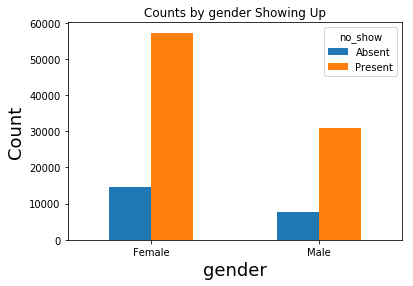

In [26]:
# Bar & Pie charts for variable 'gender' with no_show
plot_bar('gender')

This bar chart shows us that the num of females who were present at their appointment are bigger than the num of males. And the num of females who were absent also are bigger than the num of males who were absent.

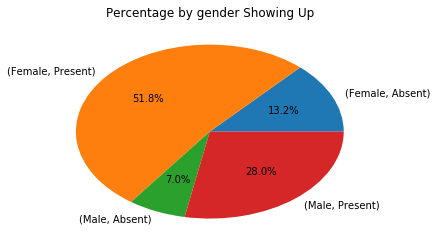

In [27]:
plot_pie('gender')

This pie chart show us the percentage of the attendance of females & males for their appointments.

### Scholarship

In [28]:
df.groupby(['scholarship', 'no_show']).size().unstack('scholarship')

scholarship,0,1
no_show,,
Absent,19741,2578
Present,79924,8283


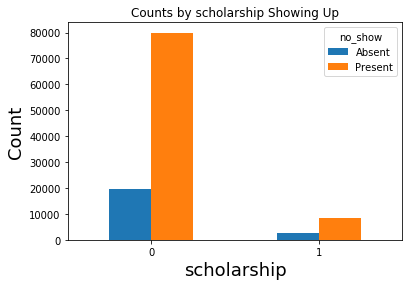

In [29]:
# Bar & Pie charts for variable 'scholarship' with no_show
plot_bar('scholarship')

The above chart shows us that having a scholarship does not affect the attendance of the patients.

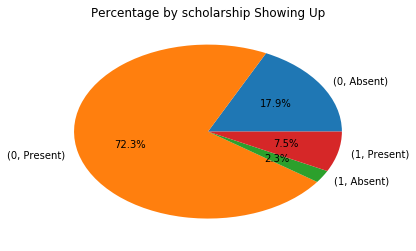

In [30]:
plot_pie('scholarship')

This chart shows us the attendance of the patients fillterd by scholarships.

### Hipertension

In [31]:
df.groupby(['hipertension', 'no_show']).size().unstack('hipertension')

hipertension,0,1
no_show,,
Absent,18547,3772
Present,70178,18029


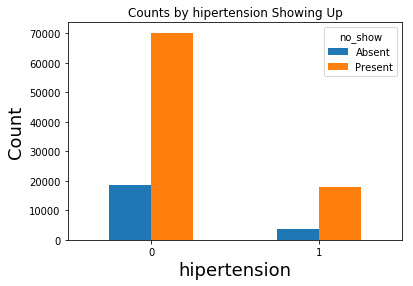

In [32]:
# Bar & Pie charts for variable 'hipertension' with no_show
plot_bar('hipertension')

This chart shows that patients without high blood pressure attend their appointments more than patients with high blood pressure.And hipertension does not affect the attendance of the patients.

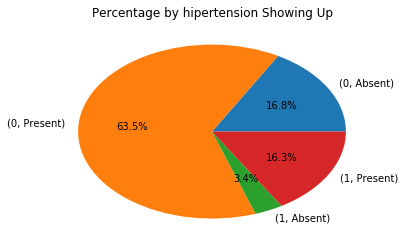

In [33]:
plot_pie('hipertension')

This chart shows us the attendance of the patients fillterd by hipertension.

### Diabetes

In [34]:
df.groupby(['diabetes', 'no_show']).size().unstack('diabetes')

diabetes,0,1
no_show,,
Absent,20889,1430
Present,81694,6513


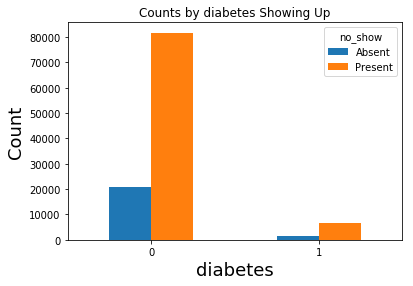

In [35]:
# Bar & Pie charts for variable 'diabetes' with no_show
plot_bar('diabetes')

This chart shows that patients without diabetes attend their appointments more than patients with diabetes.And diabetes does not affect the attendance of the patients.

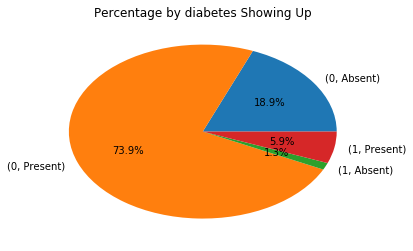

In [36]:
plot_pie('diabetes')

This chart shows us the attendance of the patients fillterd by diabetes.

### Alcoholism

In [37]:
df.groupby(['alcoholism', 'no_show']).size().unstack('alcoholism')

alcoholism,0,1
no_show,,
Absent,21642,677
Present,85524,2683


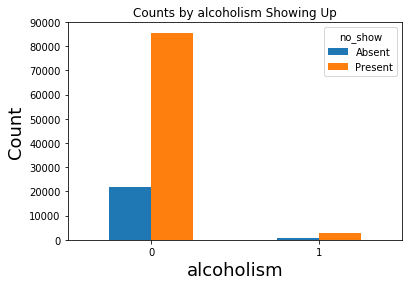

In [38]:
# Bar & Pie charts for variable 'alcoholism' with no_show
plot_bar('alcoholism')

The above chart shows that patients without alcohol addiction are presesnt at their appointments more than patients with alcohol addiction. This is a significant factor to predict if a patient will show up for their scheduled appointment.

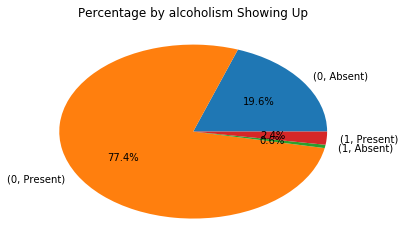

In [39]:
plot_pie('alcoholism')

This chart shows us the attendance of the patients fillterd by alcoholism.

### Handcap

In [40]:
df.groupby(['handcap', 'no_show']).size().unstack('handcap')

handcap,0,1,2,3,4
no_show,,,,,
Absent,21912,366,37,3,1
Present,86373,1676,146,10,2


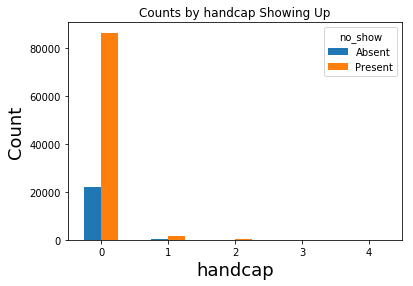

In [41]:
# Bar & Pie charts for variable 'handcap' with no_show
plot_bar('handcap')

The above chart shows that patients without handcap are presesnt at their appointments more than patients with handcap.
This is a significant factor to predict if a patient will show up for their scheduled appointment.

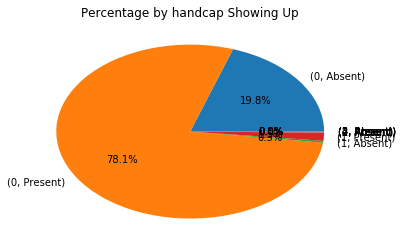

In [42]:
plot_pie('handcap')

This chart shows us the attendance of the patients fillterd by handcap.

### sms_received

In [43]:
df.groupby(['sms_received', 'no_show']).size().unstack('sms_received')

sms_received,0,1
no_show,,
Absent,12535,9784
Present,62509,25698


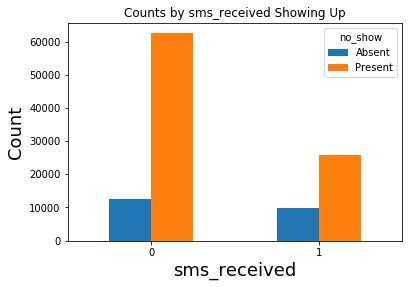

In [44]:
# Bar & Pie charts for variable 'sms_received' with no_show
plot_bar('sms_received')

This visualization shows that absent patients who didn't receive sms are more than absent patients who recieved sms & present patients who didn't recieve sms are more than present patients who recieved sms.

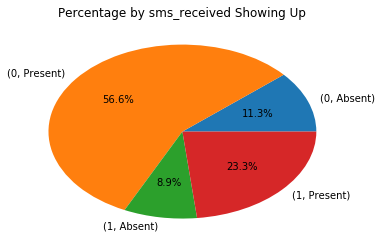

In [45]:
plot_pie('sms_received')

This chart shows us the attendance of the patients fillterd by sms_received.

### Result:
<li>For the variable that give highest attendance rate are variable with zero handcap consists of 78.2%.</li>
<li>Follow by alcoholism variable with 77.4% attendance rate that are not alcoholism.</li>
<li>This two (handcap & alcoholism) are the significant factors to predict if a patient will show up for their scheduled appointment.</li>

### Research Question 3
<li>Which day are the most appointment made? How was the attendance rate for each day?</li>

In [46]:
# Change the appointmentday data type from object to datetime
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [47]:
# Create new column name 'weekday' from 0 to 6 where 0 is Monday 6 is Sunday
df['weekday']=df['appointmentday'].dt.dayofweek

##### Note:
0:Monday  1:Tuesday  2:Wednesday  3:Thursday  4:Friday  5:Saturday  6:Sunday

In [48]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,weekday
0,Female,2016-04-29T18:38:08Z,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Present,4
1,Male,2016-04-29T16:08:27Z,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Present,4
2,Female,2016-04-29T16:19:04Z,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Present,4
3,Female,2016-04-29T17:29:31Z,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present,4
4,Female,2016-04-29T16:07:23Z,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Present,4


In [49]:
# The total count of appointments made by day
df_day = df.groupby(['weekday']).count()['age']
df_day

weekday
0    22714
1    25640
2    25867
3    17247
4    19019
5       39
Name: age, dtype: int64

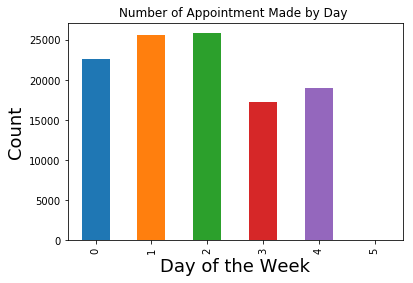

In [50]:
# Bar & Pie charts to observe the total count of appointments made by day
df_day.plot(kind='bar', title = 'Number of Appointment Made by Day ')
plt.xlabel('Day of the Week', fontsize=18)
plt.ylabel('Count', fontsize=18);

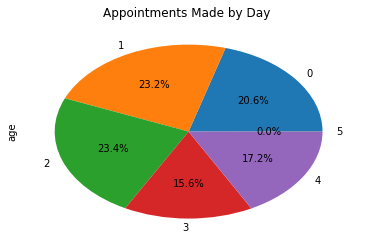

In [51]:
df_day.plot(kind='pie', title = 'Appointments Made by Day ', autopct='%1.1f%%');

### Result:
Wednesday was the day with highest total amount of appointment made which is 25867 (23.4%). Comes after it Tuesday with 25640 (23.2%). The lowest total amount of appointment made is Saturday with 39 and no record found in Sunday.

<a id='conclusions'></a>
## Conclusions
At the end of this project we can say that we have a clearer view about the data we investigated and here it is a brief of what we observed:
<li>For the first question we figured that most of the patients attended rheir appointments with a percentage of (79.8%).</li>
<li>For the second question handcap & alcoholism are the significant factors to predict if a patient will show up for their scheduled appointment.</li>
<li>And for the third and last question Wednesday was the most popular day for people to attend their appointments & Saturday was the least popular day for people to attend their appointments.</li>


### Limitations
There was a problem with negative values in age column and i had to limit my analysis for the positive number only because it's not convenient to have ages in negative values.







In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0